# Titanic Survival Predicton

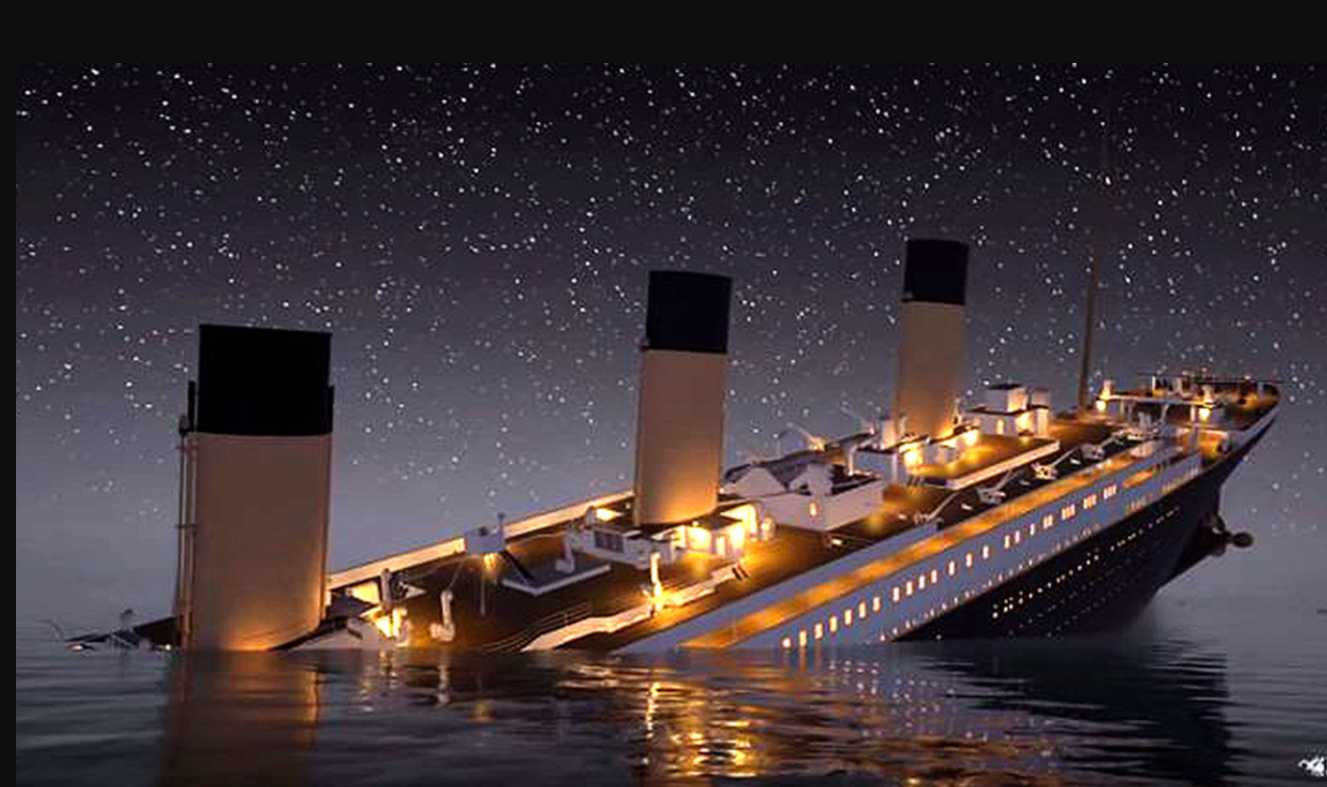

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv('tested.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
print("Data Size: ",titanic.size)

Data Size:  5016


In [4]:
print("Data Shape: ",titanic.shape)

Data Shape:  (418, 12)


## Statiscal Properties of the Data

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Some Important Visualizations

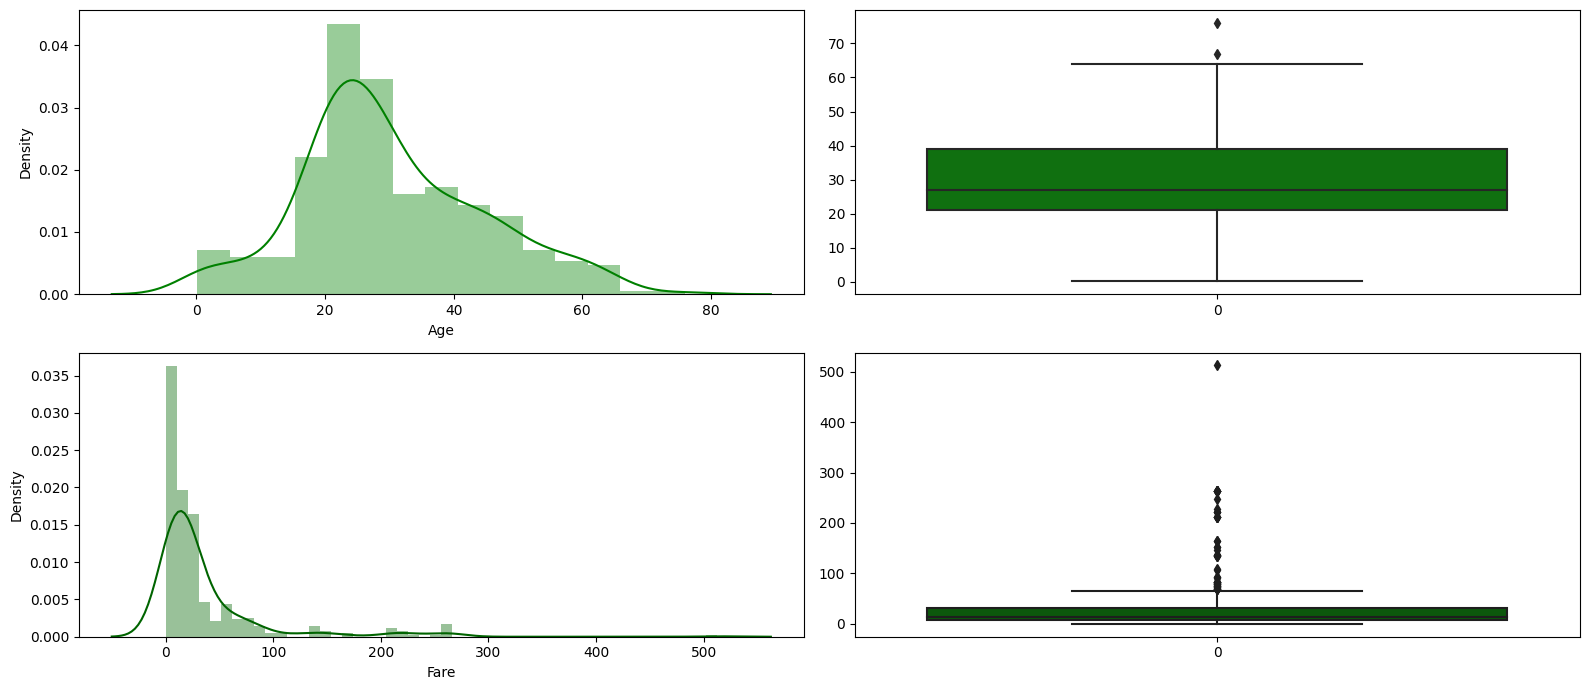

In [6]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(titanic['Age'],color='Green')
plt.subplot(2,2,2)
sns.boxplot(titanic['Age'],color='Green')

plt.subplot(2,2,3)
sns.distplot(titanic['Fare'],color='Darkgreen')
plt.subplot(2,2,4)
sns.boxplot(titanic['Fare'],color='Darkgreen')

plt.tight_layout()
plt.show()

#### Insight:
In the Titanic dataset, we visualized the distributions of two important numerical features, 'Age' and 'Fare,' using histograms and box plots. The 'Age' distribution shows a slight right skew, indicating a relatively higher number of younger passengers on board. The box plot for 'Age' reveals the median age and the presence of some outliers. On the other hand, the 'Fare' distribution is positively skewed, suggesting that most passengers paid lower fares. The 'Fare' box plot displays the spread of fares, with a few extreme outliers indicating premium or special fare tickets. These visualizations provide valuable insights into the age and fare characteristics of passengers on the Titanic, which could be crucial in predicting the survival outcomes.

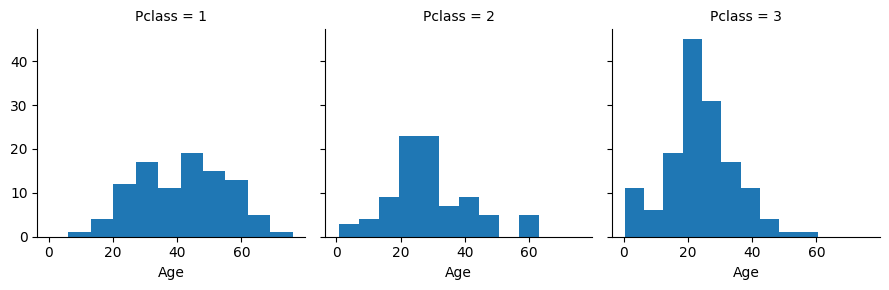

In [7]:
g = sns.FacetGrid(titanic, col="Pclass")
g = g.map(plt.hist, "Age")

#### Insight:
The FacetGrid visualization allows us to observe how the age distribution varies across different passenger classes on the Titanic. By examining the histograms, we can identify any age-related patterns or disparities among passengers in various classes. This analysis could potentially help us understand how age might have influenced the class demographics and survival rates during the tragic event.

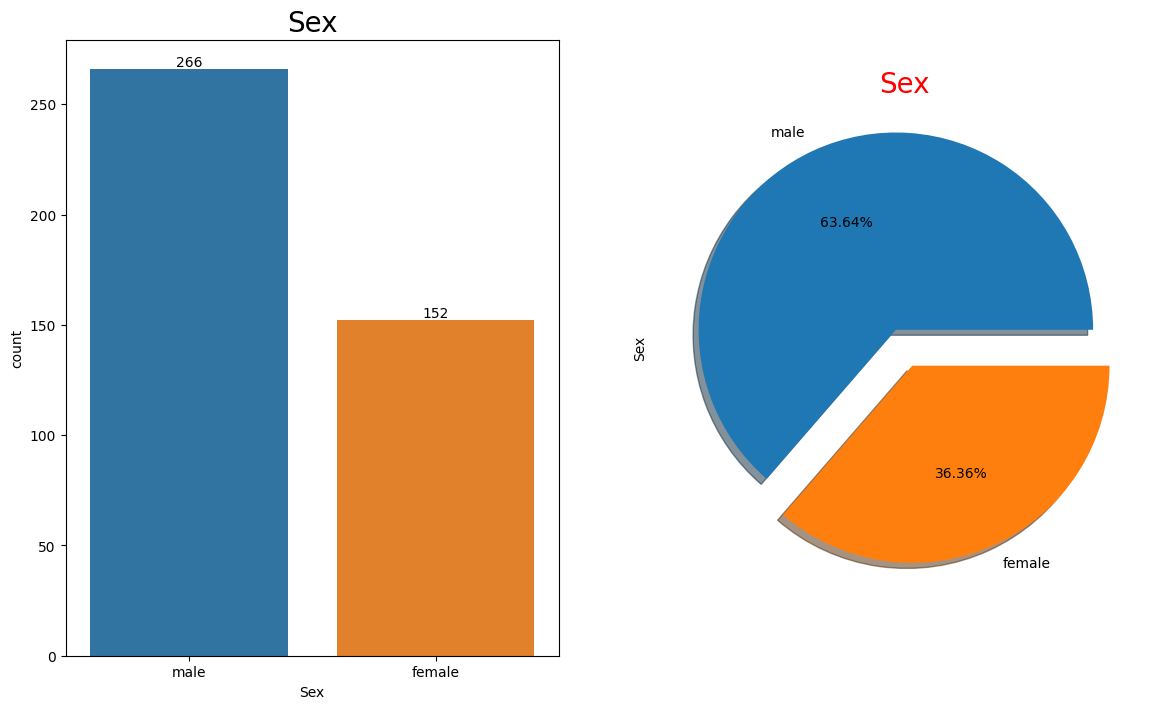

In [8]:
plt.figure(figsize=(14,8))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex', data=titanic)
ax.bar_label(ax.containers[0])
plt.title("Sex", fontsize=20)
ax =plt.subplot(1,2,2)
ax=titanic['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 20,color='Red');

#### Insight:
The bar chart on the left provides a clear and straightforward representation of the gender distribution among passengers. It shows the count of males and females, with the bars displaying the respective counts. From this chart, we can easily see the relative number of male and female passengers.

On the other hand, the pie chart on the right presents the gender distribution as a percentage of the whole. The chart is divided into two segments: one for males and the other for females. The percentage labels inside the chart show the proportion of males and females in the dataset. This visualization allows us to grasp the gender distribution in a more visually appealing and intuitive manner.

By combining both visualizations, we can quickly understand the male-to-female ratio on the Titanic, which might be essential for further analysis, such as exploring survival rates based on gender or studying any gender-related patterns during the event.

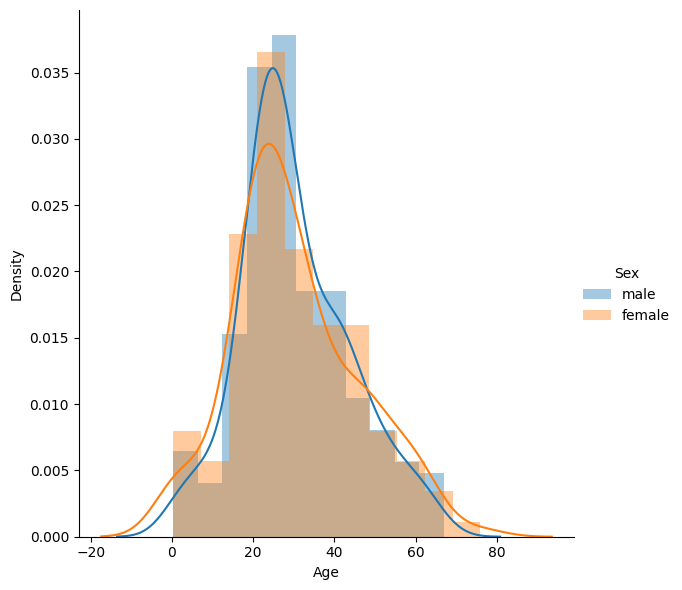

In [9]:
sns.FacetGrid(titanic, hue='Sex', height=6).map(sns.distplot, 'Age').add_legend()
plt.show()

#### Insight:
The FacetGrid with overlaid histograms allows us to compare the age distributions of male and female passengers side by side. By observing these histograms, we can identify any disparities or patterns in the age distribution between the genders. This visualization is useful in understanding the age demographics of male and female passengers separately and can provide insights into potential age-related factors that might have influenced survival outcomes on the Titanic. Additionally, the legend included in the plot makes it easy to differentiate between the two groups, further enhancing the interpretability of the visualization.

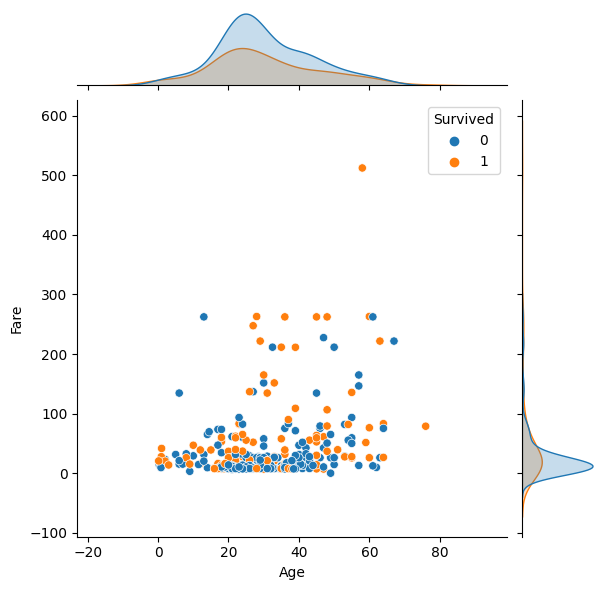

In [10]:
sns.jointplot(x="Age",y="Fare",data=titanic,color="olive",hue="Survived")
plt.show()

#### Insight:
The joint plot helps us explore the potential correlation between the age and fare paid by passengers, while also considering the survival outcomes. By examining the scatter points, we can gain insights into the distribution of passengers' ages and fares and any potential patterns or trends that might exist. The use of color encoding based on survival outcomes allows us to understand how survival rates vary in different regions of the 'Age' and 'Fare' space.
For example, if we notice a higher concentration of survivors in a particular region of the plot, it might indicate that passengers within that age and fare range had a higher chance of survival. Conversely, if we observe more non-survivors in another region, it could suggest that passengers with similar age and fare characteristics were less likely to survive.
This joint plot serves as a valuable visualization to understand the relationships between age, fare, and survival in the Titanic dataset, providing potential insights into factors that might have influenced passengers' survival during the tragedy.

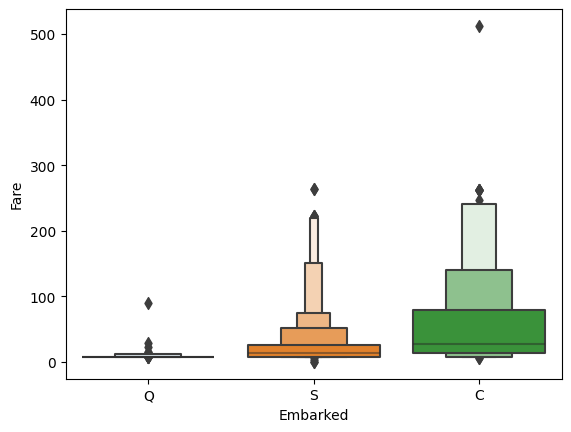

In [11]:
sns.boxenplot(y="Fare", x="Embarked", data=titanic)
plt.show()

#### Insight:
The boxen plot allows us to compare the fare distribution across the three different ports of embarkation: 'C' (Cherbourg), 'Q' (Queenstown), and 'S' (Southampton). The plot displays a series of "steps" or "boxes" that represent the distribution of fares for each port.
1. The central lines inside each box denote the median fare for each port, giving an idea of the typical fare paid by passengers from each location.
2. The width of the boxes provides an indication of the spread of fares. Wider boxes indicate greater variability in fare prices for that particular port.
3. The presence of any outliers beyond the whiskers of the boxes, which are represented by the lines extending from the boxes. Outliers could indicate unusually high or low fares for a specific port.

These insights might be relevant in understanding how the embarkation port might have influenced the passenger demographics and potentially their survival rates during the Titanic disaster.

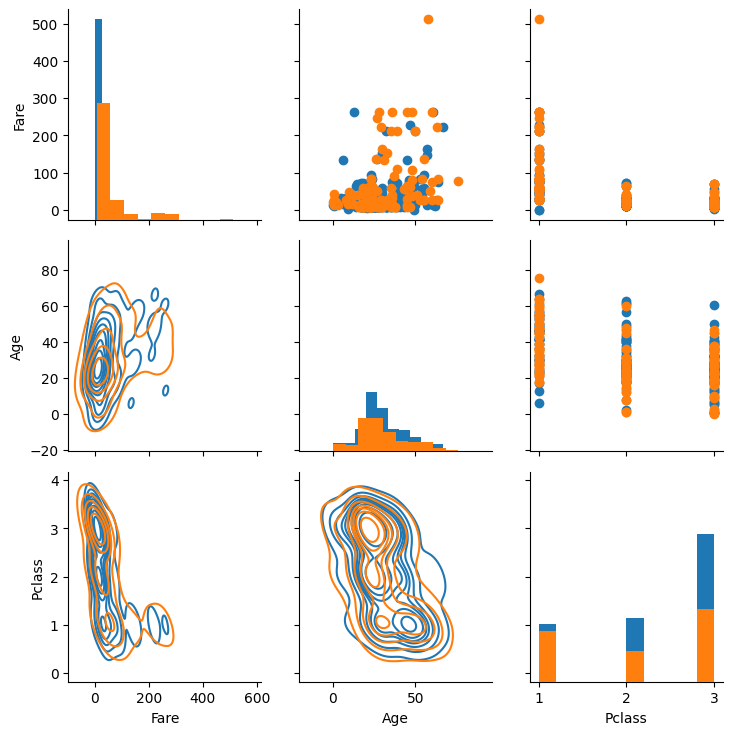

In [12]:
titanic_g = sns.PairGrid(titanic,hue='Sex',vars=['Fare','Age','Pclass'])
titanic_g.map_diag(plt.hist)
titanic_g.map_upper(plt.scatter)
titanic_g.map_lower(sns.kdeplot)
plt.show()

The PairGrid visualization offers a comprehensive view of the relationships between 'Fare', 'Age', and 'Pclass', while considering the gender ('Sex') aspect. This allows us to explore potential correlations, distributions, and patterns among these variables.
1. The histograms on the diagonal provide insights into the univariate distributions of 'Fare', 'Age', and 'Pclass'.
   We can observe the spread and concentration of values for each feature, which can help in understanding their 
   individual distributions.
2. The scatter plots in the upper triangle reveal the pairwise relationships between 'Fare', 'Age', and 'Pclass'.
   By examining the scatter points, we can identify any potential correlations or trends between these features.
   The different colors based on 'Sex' allow us to see how gender might influence these relationships.
3. The kde plots in the lower triangle provide smooth representations of the joint distributions of 'Fare', 'Age', and 'Pclass'.
   These plots can reveal the density of data points and help identify regions of higher data concentration.
   
These insights can be instrumental in understanding the relationships between these variables and their potential influence on survival outcomes during the Titanic tragedy.

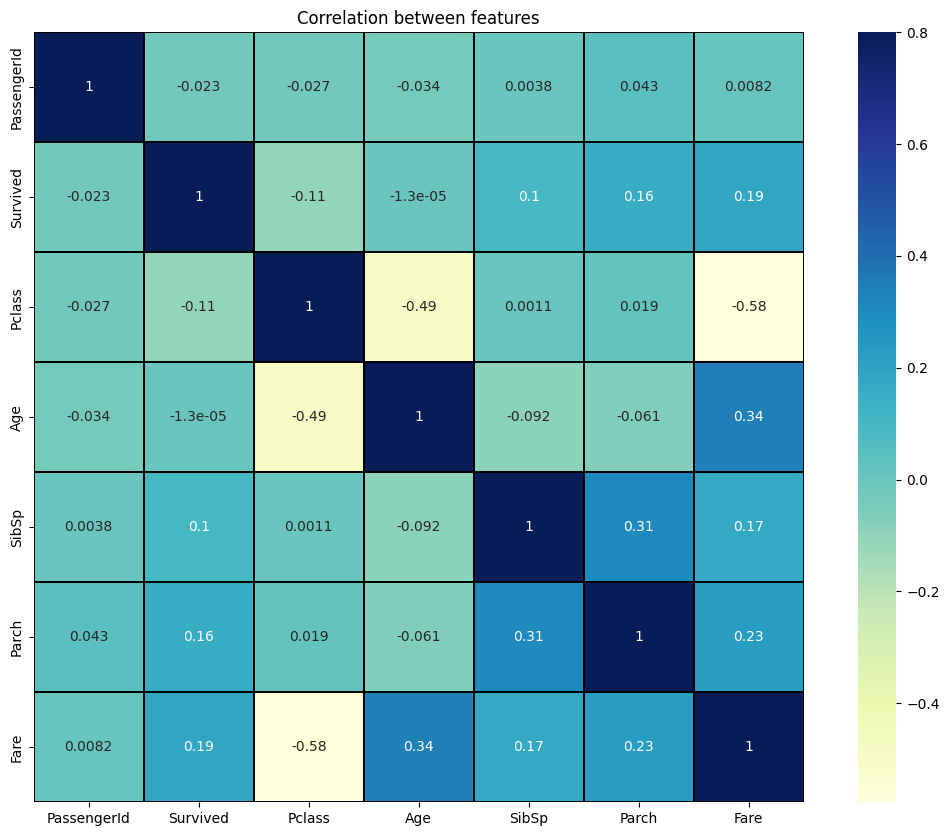

In [13]:
corr=titanic.corr()#["Survived"]
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

#### Insight:
The heatmap provides a clear and concise overview of the correlation between different numerical features in the Titanic dataset. Each cell in the heatmap represents the correlation coefficient between two features. By analyzing the correlation heatmap, we can gain insights into which features might be more influential or redundant in relation to one another. This information can be helpful in feature selection, identifying key factors that could impact survival predictions, and guiding the feature engineering process during the development of predictive models for the Titanic dataset.

In [14]:
hig_corr = titanic.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Fare"]) >= 0.25]
hig_corr_features

Index(['Pclass', 'Age', 'Fare'], dtype='object')

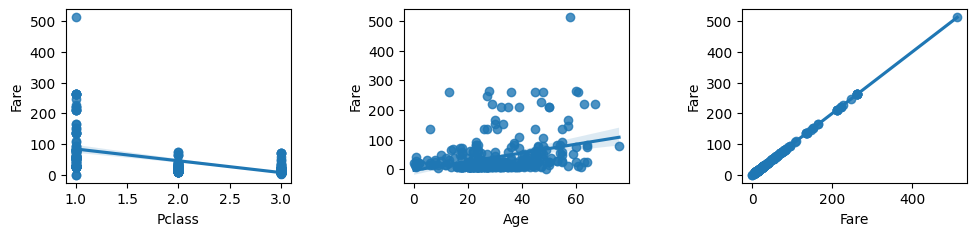

In [15]:
# Plot regplot to get the nature of highly correlated data

plt.figure(figsize=(16,9))
for i in range(len(hig_corr_features)):
    if i <= 9:
        plt.subplot(3,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data=titanic, x = hig_corr_features[i], y = 'Fare')
plt.show() 

## Data Preprocessing

In [16]:
# Missing Values
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values
missing(titanic)

,Missing_Number,Missing_Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


#### Different way to Visualize Missing Value

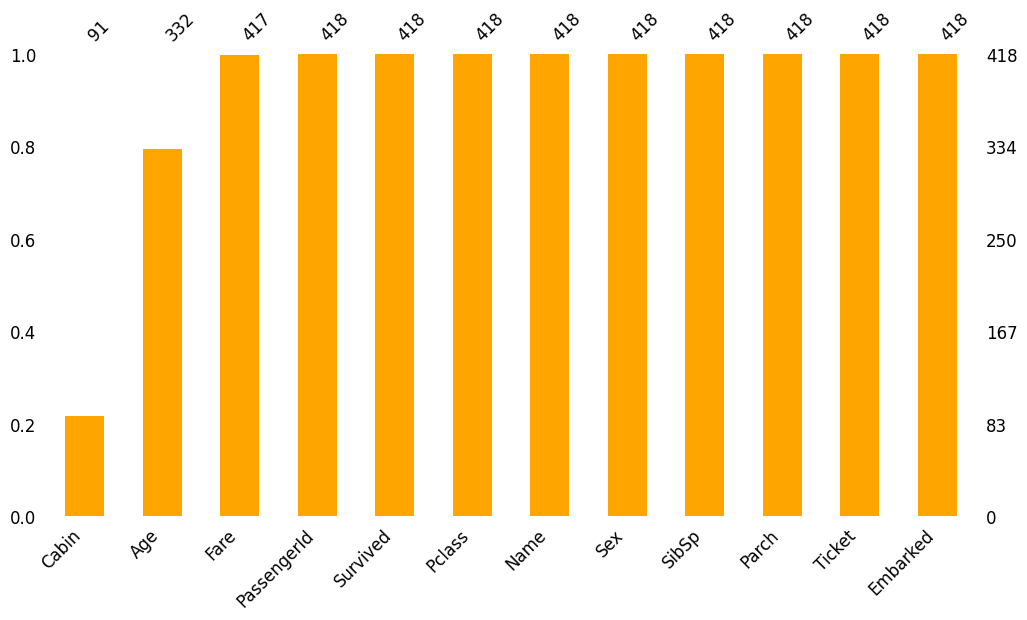

In [17]:
import missingno
missingno.bar(titanic, color="orange", sort="ascending", figsize=(12,6), fontsize=12);

In [18]:
# Filled the missing value in Age column with the mean value
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [19]:
# Filled the missing value in Embarked columns with backfill method
titanic['Embarked'] = titanic['Embarked'].fillna(method='backfill')

In [20]:
# Filled the missing value in Fare columns with mean Value
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())

In [21]:
# Drop the columns 
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
5,0,3,male,14.0,0,0,9.2250,S
6,1,3,female,30.0,0,0,7.6292,Q
7,0,2,male,26.0,1,1,29.0000,S
8,1,3,female,18.0,0,0,7.2292,C
9,0,3,male,21.0,2,0,24.1500,S


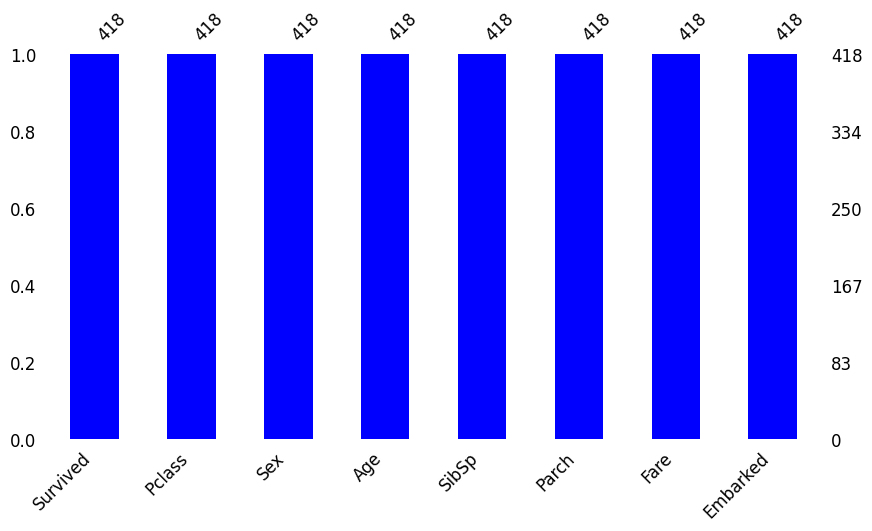

In [22]:
#Check whether Missing Values are filled
import missingno
missingno.bar(titanic, color="blue", sort="ascending", figsize=(10,5), fontsize=12);

#### Convert Categorical value to Numerical value

In [29]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked'])
titanic_encoded = encoder.fit_transform(titanic)
titanic_encoded.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,34.5,0,0,7.8292,1
1,2,1,2,47.0,1,0,7.0000,2
2,1,2,1,62.0,0,0,9.6875,1
3,1,1,1,27.0,0,0,8.6625,2
4,2,1,2,22.0,1,1,12.2875,2
5,1,1,1,14.0,0,0,9.2250,2
6,2,1,2,30.0,0,0,7.6292,1
7,1,2,1,26.0,1,1,29.0000,2
8,2,1,2,18.0,0,0,7.2292,3
9,1,1,1,21.0,2,0,24.1500,2


#### Split Dependent and Independent varialbles

In [30]:
X = titanic_encoded.drop(['Survived'],axis=1)
y = titanic['Survived']

#### Split into Train and Test Data

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)
X_train.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,3,2,64.00000,0,2,83.1583,3
201,1,1,0.33000,0,2,14.4000,2
336,2,1,32.00000,0,0,13.0000,2
187,1,1,17.00000,2,0,8.0500,2
214,1,2,38.00000,4,2,7.7750,2
283,1,2,9.00000,1,1,15.2458,3
19,1,2,45.00000,0,0,7.2250,3
282,1,2,30.27259,0,0,7.7500,1
142,3,1,61.00000,1,3,262.3750,3
348,2,1,24.00000,0,0,13.5000,2


In [33]:
y.head(10)

0    0
1    1
2    0
3    0
4    1
5    0
6    1
7    0
8    1
9    0
Name: Survived, dtype: int64

# Model Building

### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

print("Training set score: {:.2f}".format(rf_ent.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf_ent.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_rfe)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rfe))
print("Classification_Report: \n",classification_report(y_test,y_pred_rfe))

Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix: 
 [[76  0]
 [ 0 50]]
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## Conclusion

The Random Forest model achieved a high accuracy score on both the training and test sets, indicating that it can effectively predict survival outcomes for passengers on the Titanic. The model's ability to generalize well to unseen data suggests that it has learned meaningful patterns and features from the training set.

In conclusion, the Random Forest classifier proves to be a valuable tool for predicting passenger survival on the Titanic based on the provided features. The model's high accuracy and well-balanced performance across classes indicate its potential usefulness in understanding survival patterns and assisting in historical analysis of the tragic event. However, there is still room for further model refinement and feature engineering to enhance its predictive capabilities.

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)),'\n')
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)),'\n')
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_lr)),'\n')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_lr),'\n')
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))

Training set score: 1.00 

Test set score: 1.00 

Accuracy Score: 1.00 

Confusion Matrix: 
 [[76  0]
 [ 0 50]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



### Conclusion

The Logistic Regression model achieved reasonably high accuracy scores on both the training and test sets, indicating its effectiveness in predicting passenger survival on the Titanic based on the provided features.

In conclusion, the Logistic Regression model proves to be an effective and interpretable tool for predicting passenger survival on the Titanic based on the provided features. Its ability to generalize well to unseen data and balanced performance across classes makes it a valuable option for understanding survival patterns during the tragic event. However, further exploration of feature engineering and model tuning could potentially enhance its predictive capabilities even further.